In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\M\\Machine_L\\data\\KNN_Project_Data', index_col = 0)
df.head(2)

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
XVPM,,,,,,,,,,
1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1


## 유리의 종류를 분류하는 KNeighborsClassifier 알고리즘 모델을 학습시켜서 생성
- 하이퍼 파라미터 최적화를 통한 과적합이나 과소적합이 아닌 최적합의 모델을 도축하고 모델을 평가하시오
- input_data : 유리의 화학적 성분의 값
- target data : 0 or 1

In [5]:
#1. 데이터 전처리 - 할 거 없음
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1636.6706142430205 to 1287.1500253834342
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GWYH          1000 non-null   float64
 1   TRAT          1000 non-null   float64
 2   TLLZ          1000 non-null   float64
 3   IGGA          1000 non-null   float64
 4   HYKR          1000 non-null   float64
 5   EDFS          1000 non-null   float64
 6   GUUB          1000 non-null   float64
 7   MGJM          1000 non-null   float64
 8   JHZC          1000 non-null   float64
 9   TARGET CLASS  1000 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 85.9 KB


In [6]:
#2. X, y 나누기
X = df.drop('TARGET CLASS', axis = 1)
y = df['TARGET CLASS']

In [7]:
#3. train, test 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2024)

In [33]:
#4. 모델 학습
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 36)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=36)

In [34]:
#5. 예측
pred = knn.predict(X_test)
proba = knn.predict_proba(X_test)

In [35]:
#6. 검증
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       144
           1       0.84      0.86      0.85       156

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [16]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, proba[:, :1])

0.14745815527065526

In [26]:
print(np.array(accuracy_scores).argmax())
# accuracy_scores는 리스트라 0 부터 시작하기 때문에 결과는 35가 나왔지만 n_neighbors에는 36을 넣어줘야함
print(np.array(accuracy_scores).max())

35
0.8433333333333334


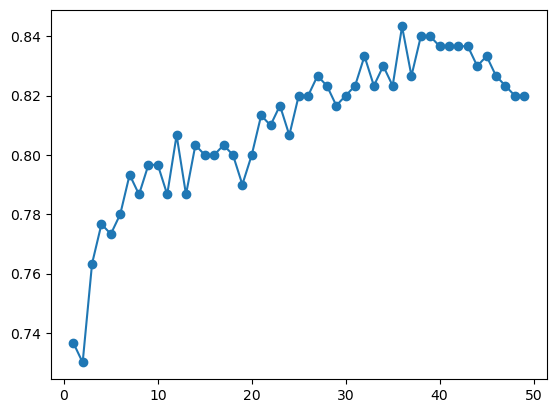

In [25]:
# 7. 시각화
from sklearn.metrics import accuracy_score

accuracy_scores = []

for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, pred))

plt.plot(range(1, 50), accuracy_scores, marker = 'o')